<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     486 non-null    int64 
 1   Previous Scores                   486 non-null    int64 
 2   Extracurricular Activities        486 non-null    object
 3   Sleep Hours                       486 non-null    int64 
 4   Sample Question Papers Practiced  486 non-null    int64 
 5   ML Mid term exam                  486 non-null    int64 
 6   ES Mid term exam                  486 non-null    int64 
 7   CC Mid term exam                  486 non-null    int64 
 8   CN Mid term exam                  486 non-null    int64 
 9   BDA Mid term exam                 486 non-null    int64 
 10  Performance Index                 486 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 41.9+ KB


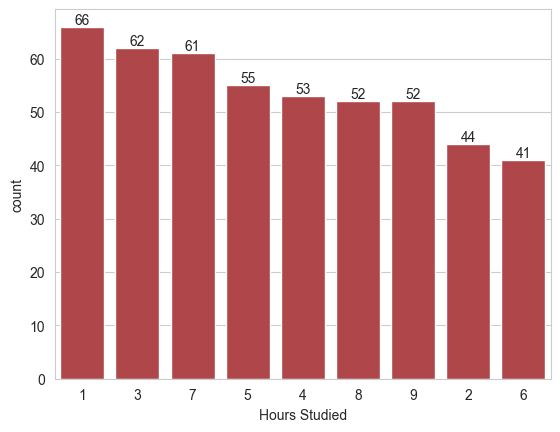

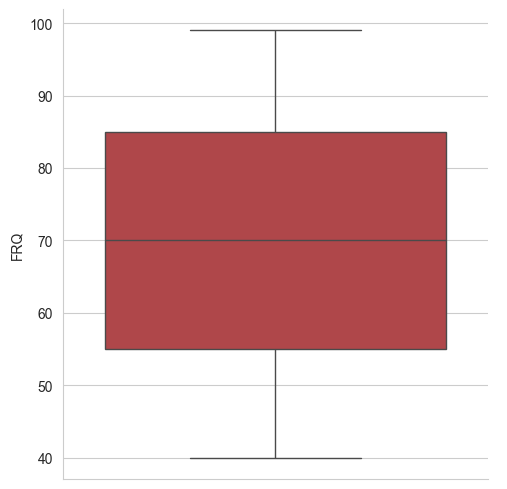

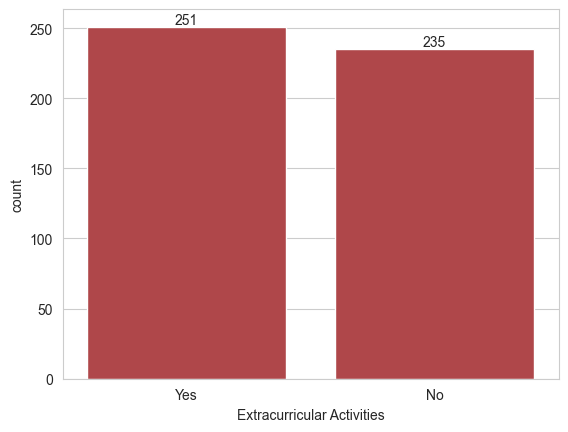

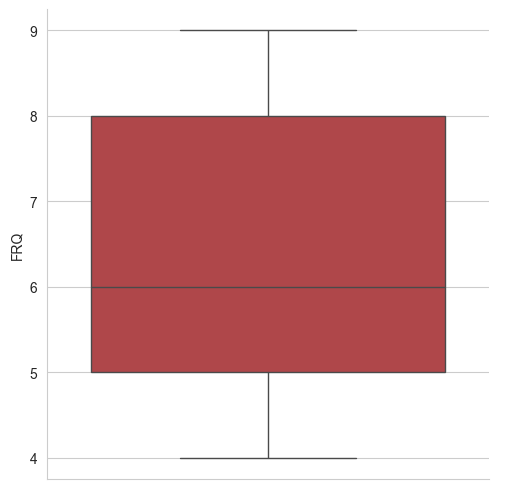

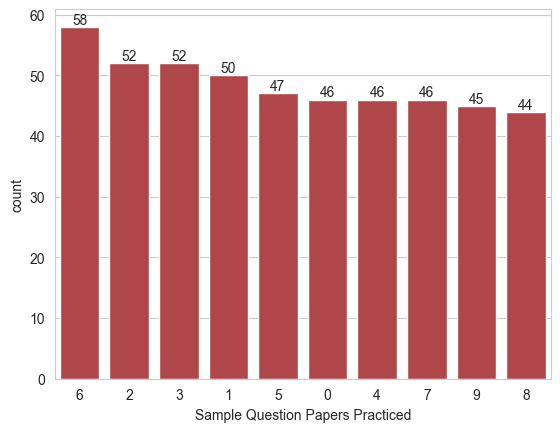

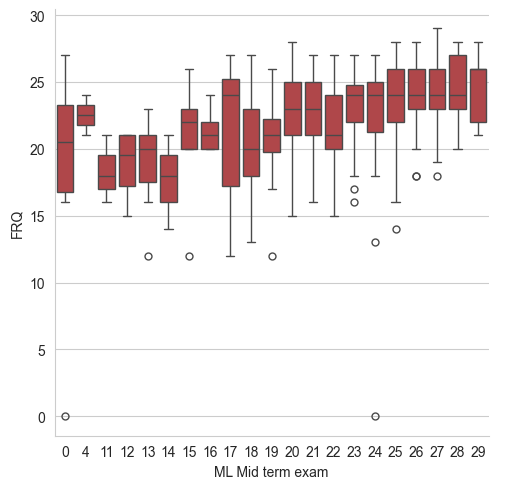

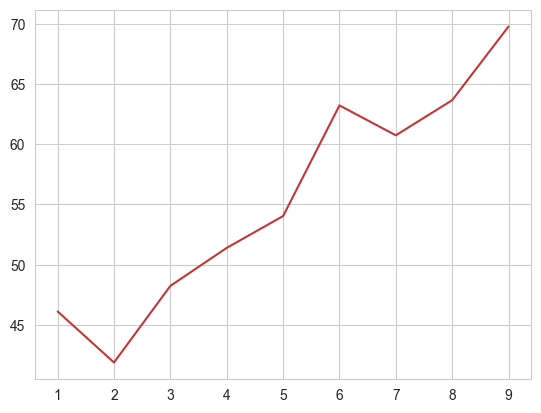

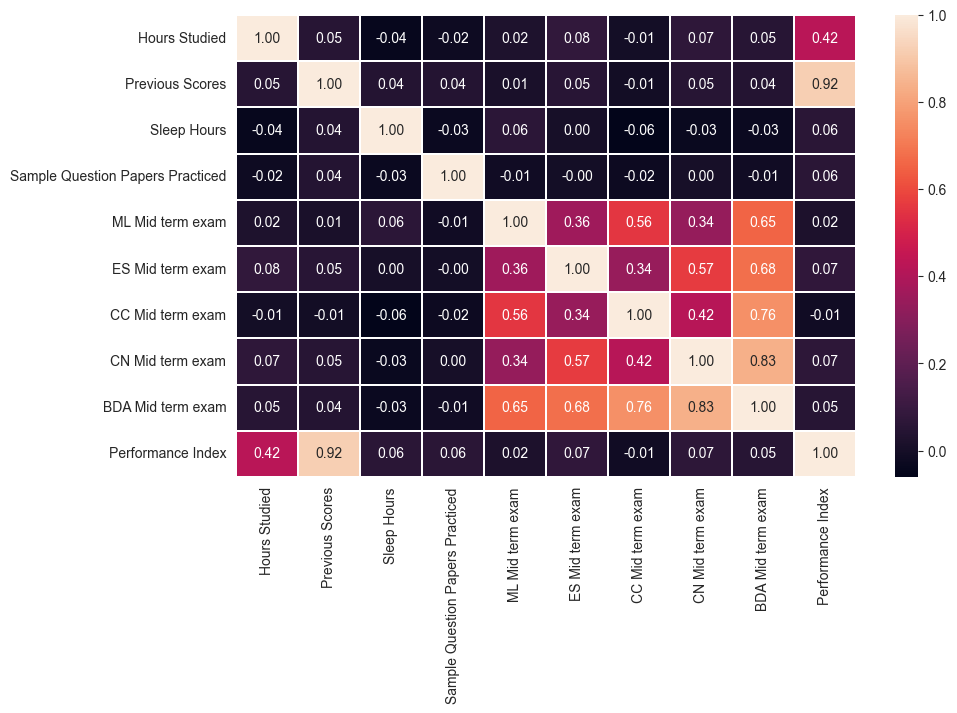

Linear Regression:
  Mean Absolute Error: 1.4479591836734698
  R-squared Score: 0.9915620786241547



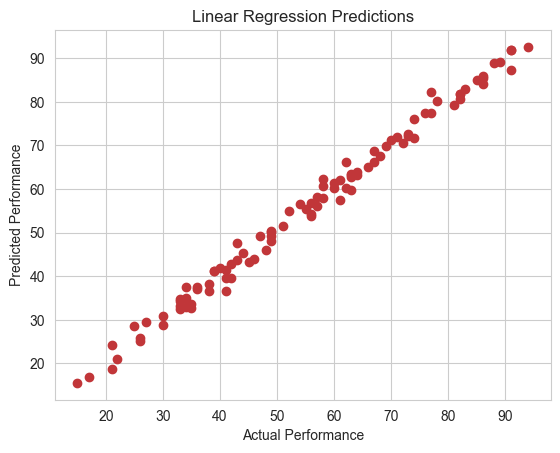

Decision Tree:
  Mean Absolute Error: 3.183673469387755
  R-squared Score: 0.9590527135701721



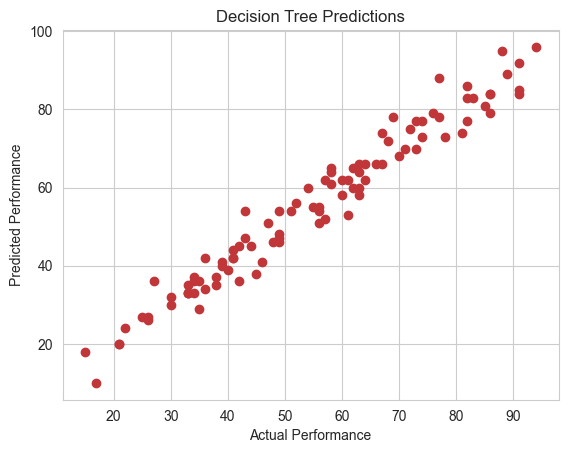

Random Forest:
  Mean Absolute Error: 2.257142857142857
  R-squared Score: 0.9791871514863896



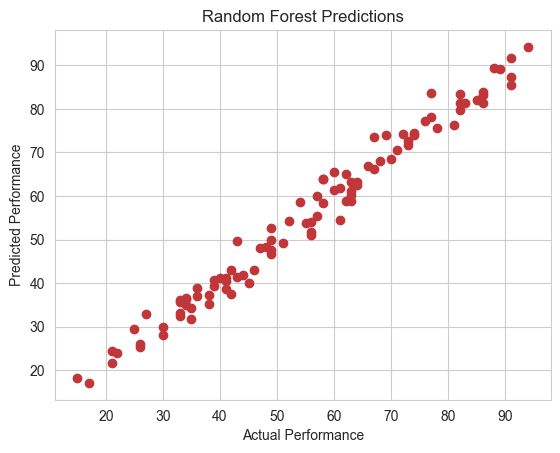

SVM:
  Mean Absolute Error: 6.512244897959184
  R-squared Score: 0.8164166327072769



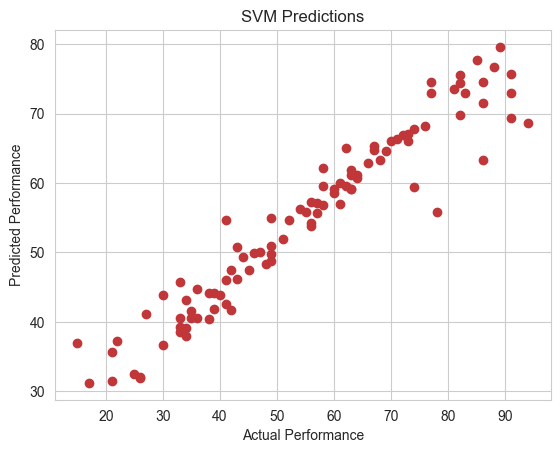

                        MAE  R-squared
Linear Regression  1.447959   0.991562
Decision Tree      3.183673   0.959053
Random Forest      2.257143   0.979187
SVM                6.512245   0.816417


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import pickle

# Set style of visualization
sns.set_style("whitegrid")
sns.set_palette("RdBu")

# Read the CSV file
data = pd.read_csv("student_performance_.csv")

# Display the first few rows of the DataFrame
data.head()

# Display the data types and summary statistics
data.info()
data.describe()

# Calculate the number of missing values in each column
data.isna().sum() / data.shape[0]

# Display the shape of the DataFrame
data.shape

# Check if there are any duplicate rows
data.duplicated().any()

# Define a function to create a count plot
def count_plot(column_name, hue=None, rotation=0):
    """
    1) input : column name, column data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) i use bar_label to show frequency of each unique values above each column in graph
    """
    graph = sns.countplot(x=column_name, data=data, hue=hue, order=data[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)

    plt.xticks(rotation=rotation)
    plt.show()

# Define a function to create a box plot
def box_plot(x_axis=None, y_axis=None, hue=None, col=None):
    """
    input : x_axis, y_axis and hue column, column data type must be numeric in y_axis
    output : box plot to see distribution of column values such as min,max,mean,medien,std
    """
    sns.catplot(x=x_axis, y=y_axis, data=data, hue=hue, kind="box", col=col)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

# --- Your Original Visualization Code ---
# Create a count plot for "Hours Studied"
count_plot(column_name="Hours Studied")

# Create a box plot for "Previous Scores"
box_plot(y_axis="Previous Scores")

# Create a count plot for "Extracurricular Activities"
count_plot(column_name="Extracurricular Activities")

# Create a box plot for "Sleep Hours"
box_plot(y_axis="Sleep Hours")

# Create a count plot for "Sample Question Papers Practiced"
count_plot(column_name="Sample Question Papers Practiced")

# Create a box plot for "Assignment01" and "Midterm Exam"
box_plot(x_axis="ML Mid term exam", y_axis="ES Mid term exam")

# Calculate the mean performance by hours studied
avg_performance_by_hours = data.groupby('Hours Studied')['Performance Index'].mean()

# Plot the mean performance by hours studied
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.show()

# Create a heatmap to visualize the correlation between numeric columns
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(exclude="object").corr(), annot=True, fmt=".2f", linewidths=0.2)
plt.show()
# --- End of Your Original Visualization Code ---

# Preprocess the data
# Encode categorical data
encoder = LabelEncoder()
data["Extracurricular Activities"] = encoder.fit_transform(data["Extracurricular Activities"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=["Performance Index"]), data["Performance Index"], test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train different ML models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVM": SVR()
}

results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = np.round(model.predict(X_test), decimals=1)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {
        "MAE": mae,
        "R-squared": r2
    }

    # Print results
    print(f"{model_name}:")
    print(f"  Mean Absolute Error: {mae}")
    print(f"  R-squared Score: {r2}\n")

    # Plot the actual and predicted performance
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Performance")
    plt.ylabel("Predicted Performance")
    plt.title(f"{model_name} Predictions")
    plt.show()

# Display the results table
results_df = pd.DataFrame(results).T
print(results_df)

# Save the best model (you'll need to choose the best based on the results)
best_model_name = "Linear Regression"  # Replace with the best model name
best_model = models[best_model_name]
filename = 'best_student_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

filename = 'student_encoder.sav'
pickle.dump(encoder, open(filename, 'wb'))

filename = 'scaled_X_train.sav'
pickle.dump(X_train, open(filename, 'wb'))

# Save scaled_X_test
filename = 'scaled_X_test.sav'
pickle.dump(X_test, open(filename, 'wb'))

filename = 'student_scaler.sav'
pickle.dump(scaler, open(filename, 'wb'))

# Save pre-trained models (Decision Tree, Linear Regression, SVM)
with open('trained_decision_tree_model.sav', 'wb') as file:
    pickle.dump(models["Decision Tree"], file)

with open('trained_linear_regression_model.sav', 'wb') as file:
    pickle.dump(models["Random Forest"], file)

with open('trained_svm_model.sav', 'wb') as file:
    pickle.dump(models["SVM"], file)